# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [278]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [279]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, add to cities list
    if city not in cities:
        cities.append(city)

# Print the city count 
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [280]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arman
Processing Record 2 of Set 1 | te anau
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | bose
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | nago
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | kineta
Processing Record 11 of Set 1 | timra
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | tilichiki
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | upernavik
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | vila velha
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | tiarei
Processing Record 22 of Set 1 | chokurdakh
Processing Record 23 of Set 1 | ja

In [281]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [282]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arman,59.7000,150.1667,270.94,82,100,1.40,RU,1680224328
1,te anau,-45.4167,167.7167,289.29,52,61,0.37,NZ,1680224669
2,paamiut,61.9940,-49.6678,261.59,81,33,3.74,GL,1680224298
3,bose,45.4612,8.0137,284.98,85,100,0.55,IT,1680224669
4,hermanus,-34.4187,19.2345,288.02,84,14,2.91,ZA,1680224278


In [283]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [284]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arman,59.7000,150.1667,270.94,82,100,1.40,RU,1680224328
1,te anau,-45.4167,167.7167,289.29,52,61,0.37,NZ,1680224669
2,paamiut,61.9940,-49.6678,261.59,81,33,3.74,GL,1680224298
3,bose,45.4612,8.0137,284.98,85,100,0.55,IT,1680224669
4,hermanus,-34.4187,19.2345,288.02,84,14,2.91,ZA,1680224278


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

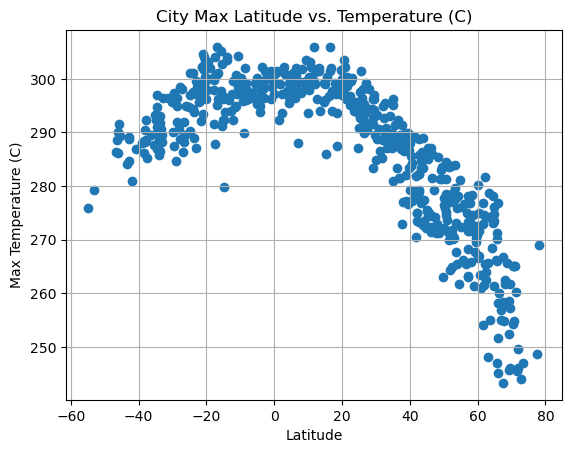

In [285]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

plt.title("City Max Latitude vs. Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

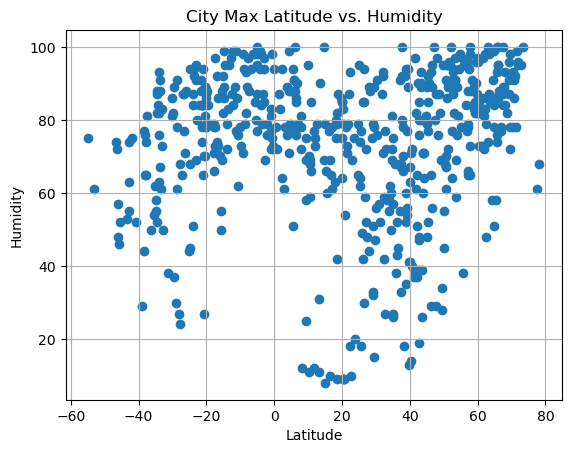

In [286]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

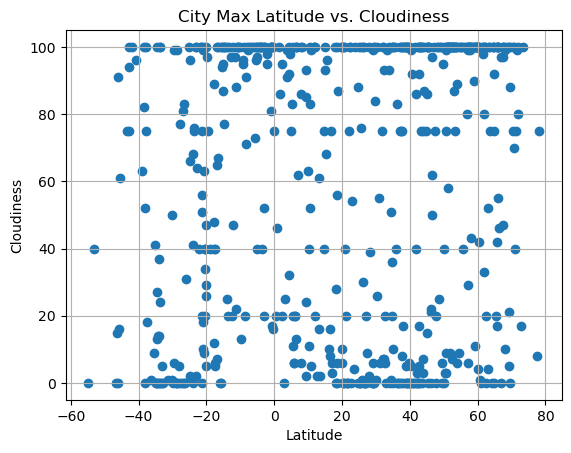

In [287]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

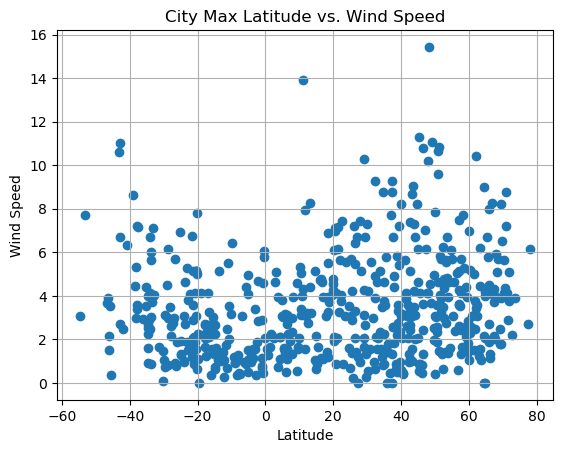

In [288]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The correlation coefficient between City Latitude and Max Temp is -0.71


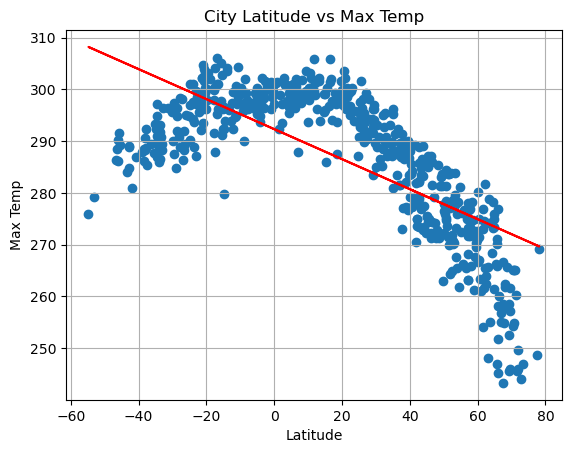

The correlation coefficient between City Latitude and Humidity is 0.07


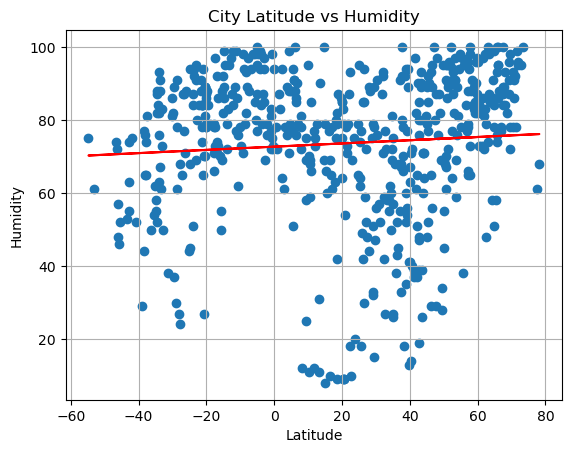

The correlation coefficient between City Latitude and Cloudiness is 0.14


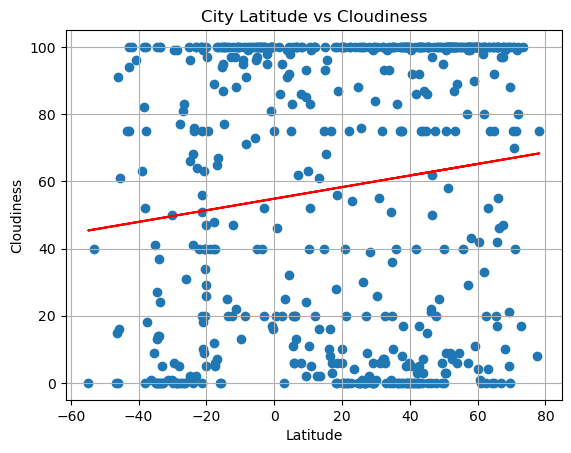

The correlation coefficient between City Latitude and Wind Speed is 0.16


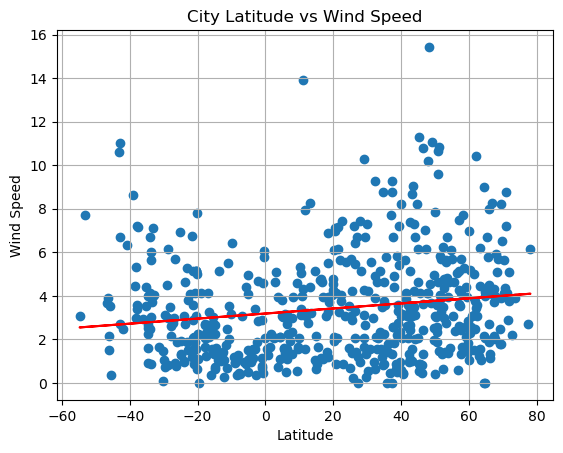

In [289]:
y_values_list = [city_data_df["Max Temp"],
                 city_data_df["Humidity"],
                 city_data_df["Cloudiness"],
                 city_data_df["Wind Speed"]
                ]

for weather_value in y_values_list:
    slope, intercept, rvalue, pvalue, stderr = linregress(city_data_df["Lat"], weather_value)
    regress_values = city_data_df["Lat"] * slope + intercept

    # Create scatter plot
    plt.scatter(city_data_df["Lat"], weather_value)

    # Plot the regression line
    plt.plot(city_data_df["Lat"], regress_values, "r")

    # Add other graph properties
    plt.title(f"City Latitude vs {weather_value.name}")
    plt.xlabel("Latitude")
    plt.ylabel(weather_value.name)
    plt.grid()

    # Save the figure
    plt.savefig(f"output_data/LinReg_{weather_value.name}.png")

    # Print the correlation coefficient
    print(f"The correlation coefficient between City Latitude and {weather_value.name} is {rvalue:.2f}")
    
    # Show plot
    plt.show()


In [290]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arman,59.7000,150.1667,270.94,82,100,1.40,RU,1680224328
2,paamiut,61.9940,-49.6678,261.59,81,33,3.74,GL,1680224298
3,bose,45.4612,8.0137,284.98,85,100,0.55,IT,1680224669
5,nago,26.5881,127.9761,295.39,85,100,5.48,JP,1680224612
8,kapaa,22.0752,-159.3190,299.33,87,75,5.66,US,1680224265
...,...,...,...,...,...,...,...,...,...
551,skibbereen,51.5500,-9.2667,283.77,96,100,5.84,IE,1680224285
552,termini imerese,37.9837,13.6956,288.61,66,0,4.42,IT,1680224757
553,pombas,17.1503,-25.0201,294.03,78,3,3.95,CV,1680224758


In [291]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,te anau,-45.4167,167.7167,289.29,52,61,0.37,NZ,1680224669
4,hermanus,-34.4187,19.2345,288.02,84,14,2.91,ZA,1680224278
6,bluff,-46.6000,168.3333,286.37,74,0,3.68,NZ,1680224256
7,ushuaia,-54.8000,-68.3000,275.96,75,0,3.09,AR,1680224192
13,mataura,-46.1927,168.8643,286.19,57,0,2.15,NZ,1680224670
...,...,...,...,...,...,...,...,...,...
535,vallenar,-28.5708,-70.7581,294.91,61,0,0.83,CL,1680224755
539,santiago del estero,-27.7951,-64.2615,298.41,68,0,2.14,AR,1680224358
542,kasane,-17.8167,25.1500,291.51,66,89,2.70,BW,1680224755


###  Temperature vs. Latitude Linear Regression Plot

Correlation coefficient: -0.9


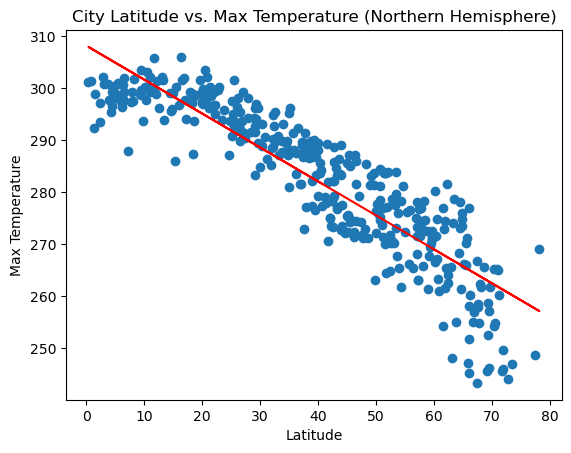

In [292]:
# Scatter plot of Latitude vs Max Temperature
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

Correlation coefficient: 0.66


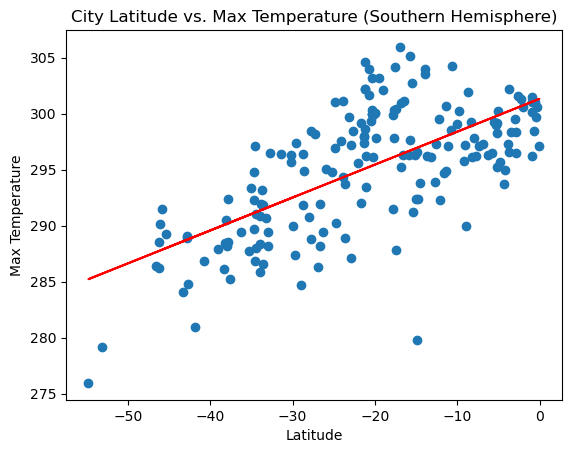

In [293]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres, there is a strong correlation between closeness to the equator (latitude 0) and higher maximum temperatures. In the northern hemisphere, this is represented by a negative correlation, since the x-axis is in descending order. In the southern hemisphere, this is represented by a positive correlation because the x-axis is in ascending order. For this data set, this correlation seems to be stronger in the northern hemisphere, as the correlation coefficient is higher and the data points are more closely grouped. Therefore, the linear regression may be more reliable to predict future temperature points.

### Humidity vs. Latitude Linear Regression Plot

Correlation coefficient: 0.28


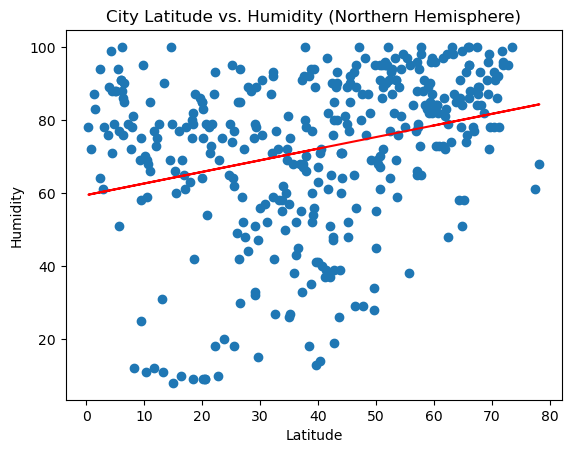

In [294]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

Correlation coefficient: 0.47


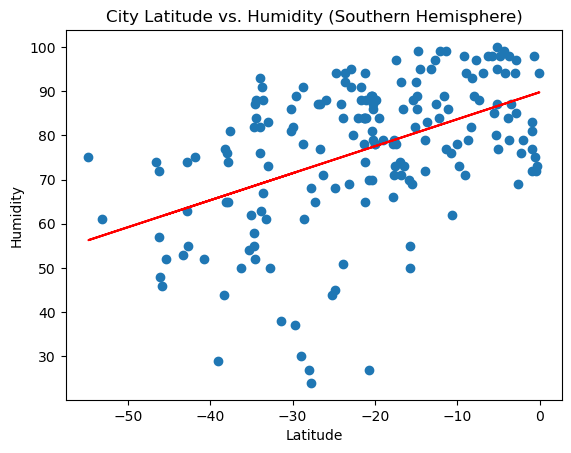

In [295]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres, there is a positive correlation between latitude and humidity. Because of the differences in latitude between the hemispheres, this means humidity increases as the x-axis values move toward the equator in the southern hemisphere, and as the values move away from the equator in the northern hemisphere. However, the linear regression of the southern hemisphere indicates a stronger relationship than in the northern hemisphere, as the points are more tightly grouped and the correlation coefficient is higher.

### Cloudiness vs. Latitude Linear Regression Plot

Correlation coefficient: 0.19


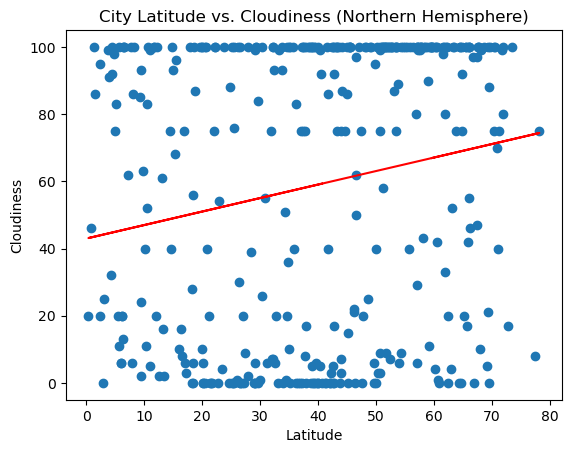

In [296]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

Correlation coefficient: 0.39


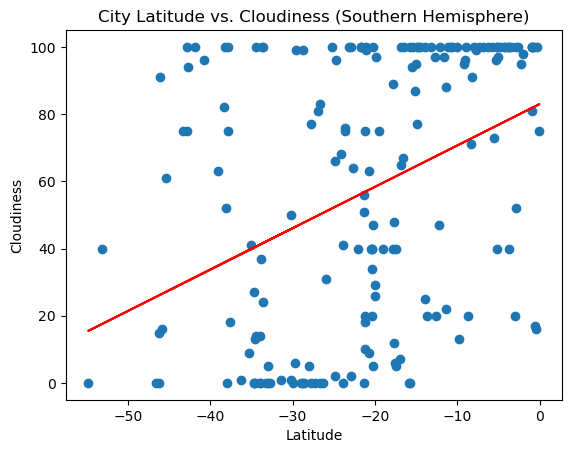

In [297]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** Both the northern and southern hemisphere have positive linear relationships between cloudiness and latitude. In both plots, points seem to be distributed at both extremes of the y-axis, across all latitudes, with fewer points at the middle y-axis values. This distribution means, visually, there seems to be little correlation. However, the correlation coefficient and the linear regressions indicate there is, indeed, a correlation, although the predictive power of these relationships is seemingly uncertain. 

### Wind Speed vs. Latitude Linear Regression Plot

Correlation coefficient: 0.14


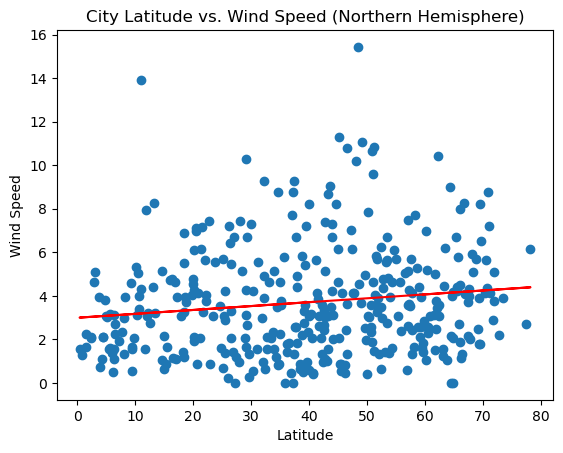

In [298]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
plt.plot(northern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

Correlation coefficient: -0.37


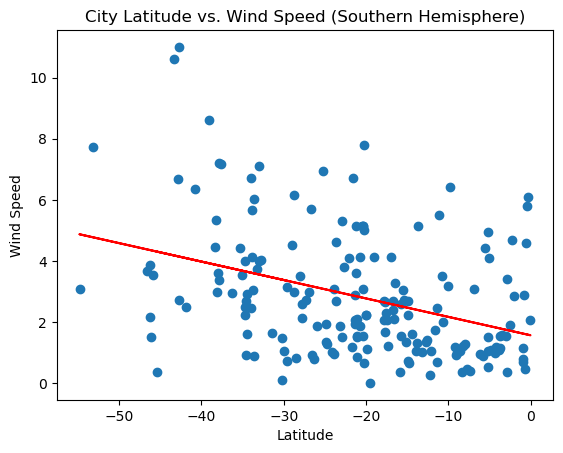

In [299]:
# Southern Hemisphere
# Northern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Plot the regression line
slope, intercept, rvalue, pvalue, stderr = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
plt.plot(southern_hemi_df["Lat"], regress_values, color='red')

# Set chart title and labels
plt.title("City Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#print correlation coefficient
print("Correlation coefficient:", round(rvalue, 2))

# Show the plot
plt.show()

**Discussion about the linear relationship:** In this data set, it seems the further a point is from the equator, the higher the wind speed will be, which is represented by a positive correlation in the northern hemisphere and a negative correlation in the southern hemisphere. This relationship also seems to be significantly stronger in the southern hemisphere than in the northern, according to the linear regression plot and the correlation coefficient. 